**Land surface emissivity (LSE)** efficiency with which a surface radiates its thermal energy. In this notebook, I show you how you can obtain LSE using the pylandtemp module.

# 1.  Import python dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio.plot
import rasterio

# 2. Location

For this tutorial, we’ll use the NIR and Red bands from a Landsat-8 scene above part of the central valley and the Sierra Nevada in California. We’ll be using Level 1TP datasets, orthorectified, map-projected images containing radiometrically calibrated data.

# 3. Bands needed from land surface emissivity computation
- Red: Band 4
- Near-Infrared (NIR): Band 5


Here, I have used `rasterio` to load the images/bands needed.

In [2]:
url = 'http://landsat-pds.s3.amazonaws.com/c1/L8/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/'
#url = 'https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/'
redband = 'LC08_L1TP_042034_20170616_20170629_01_T1_B{}.TIF'.format(4) # L1TP_216074_20160531_20180528_01_T1_B4.TIF'
nirband = 'LC08_L1TP_042034_20170616_20170629_01_T1_B{}.TIF'.format(5)

In [3]:
with rasterio.open(url+redband) as src:
    redImage = src.read(1).astype('f4')

with rasterio.open(url+nirband) as src:
    nirImage = src.read(1).astype('f4')

### Visualize the Red and NIR band images

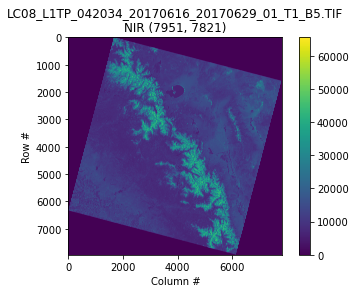

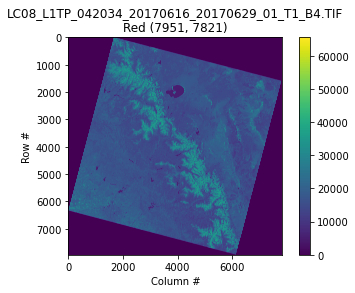

In [4]:
plt.imshow(redImage)
plt.colorbar()
plt.title('{}\nNIR {}'.format(nirband, nirImage.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')
plt.show()


plt.imshow(nirImage)
plt.colorbar()
plt.title('{}\nRed {}'.format(redband, redImage.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')
plt.show()

# 5. Compute the Normalized Difference Vegetation Index (NDVI) image from the Red and NIR images 

We need the NDVI (and in some cases) the red band image to obtain our emissivity image.
The Normalized Difference Vegetation Index is a simple indicator that can be used to assess whether the target includes healthy vegetation. This calculation uses two bands of a multispectral image dataset, the Red and Near-Infrared (NIR) bands.

This stage is only done here in the tutorial for completion. The `emissivity` module of `landtemp` handles the NDVI computation automatically. However, if you need to compute NDVI for other purposes you can follow the workflow below:

In [5]:
from pylandtemp import ndvi

In [6]:
mask = redImage == 0
ndviImage = ndvi(nirImage, redImage, mask=mask)

### Visualize NDVI

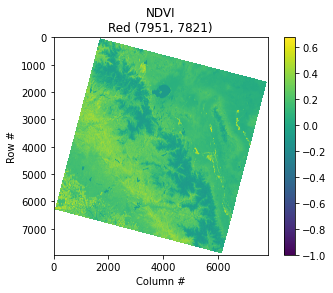

In [7]:
plt.imshow(ndviImage)
plt.colorbar()
plt.title('{}\nRed {}'.format('NDVI', ndviImage.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')
plt.show()

# 6. Compute land surface emissivity

In [11]:
from pylandtemp import emissivity

The emissivity method to be used determines what images must be provided. Specifically, *band 4* (red band) image only needs to be provided for `xiaolei` method. The `landsat_band_4`of the emissivity function defaults to `None` otherwise and should be left as it is for other methods.

Different emissivity images are obtained for the two thermal infrared bands. In the case that only one of them is needed, the first one can be taken or a mean can be obtained. The function always returns a tuple.

In [12]:
emissivity_10, emissivity_11 = emissivity(ndviImage, emissivity_method='xiaolei', landsat_band_4=redImage)

### Visualize the emissivity computed for thermal IR bands (10 and 11)

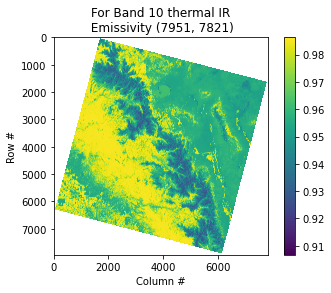

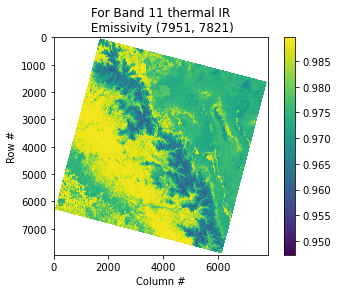

In [10]:
plt.imshow(emissivity_10)
plt.colorbar()
plt.title('{}\n Emissivity {}'.format('For Band 10 thermal IR', emissivity_10.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')
plt.show()


plt.imshow(emissivity_11)
plt.colorbar()
plt.title('{}\n Emissivity {}'.format('For Band 11 thermal IR', emissivity_11.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')
plt.show()